In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Check data retrieved from a test data logger installed in the field
--

In [15]:
import pandas as pd
%matplotlib inline

**This cell is site specific**

In [16]:
directory = './LowerTeMaari/'
csvfile = 'Table1.csv'
loggerfile = directory+csvfile
dtstart = '2018-08-10T00:20:00'

# directory = './Inferno/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2017-12-06T00:30:00'

# directory = './RuapehuCraterLake/'
# csvfile = 'Table1.csv'
# loggerfile = directory+csvfile
# dtstart = '2018-05-04T04:00:00'

**Read data**

In [17]:
df = pd.read_csv(loggerfile, parse_dates=True, index_col = 'Datetime')

#Use only data after logger was installed
data = df[df.index>=dtstart]

In [18]:
data.tail()

,RecNbr,LoggerName,SupplyVolts,LithiumVolts,PTemp_degC,Temp_PRT_degC,nmbr_satellites_Avg
Datetime,,,,,,,
2018-08-11 00:20:00,136,LowerTeMaari,13.90,3.667,10.33,51.150002,10.0
2018-08-11 00:30:00,137,LowerTeMaari,13.89,3.664,10.52,51.150002,10.0
2018-08-11 00:40:00,138,LowerTeMaari,13.88,3.668,10.73,51.150002,10.0
2018-08-11 00:50:00,139,LowerTeMaari,13.89,3.666,10.99,51.139999,10.0
2018-08-11 01:00:00,140,LowerTeMaari,13.87,3.665,11.28,51.150002,10.0


**Voltages**

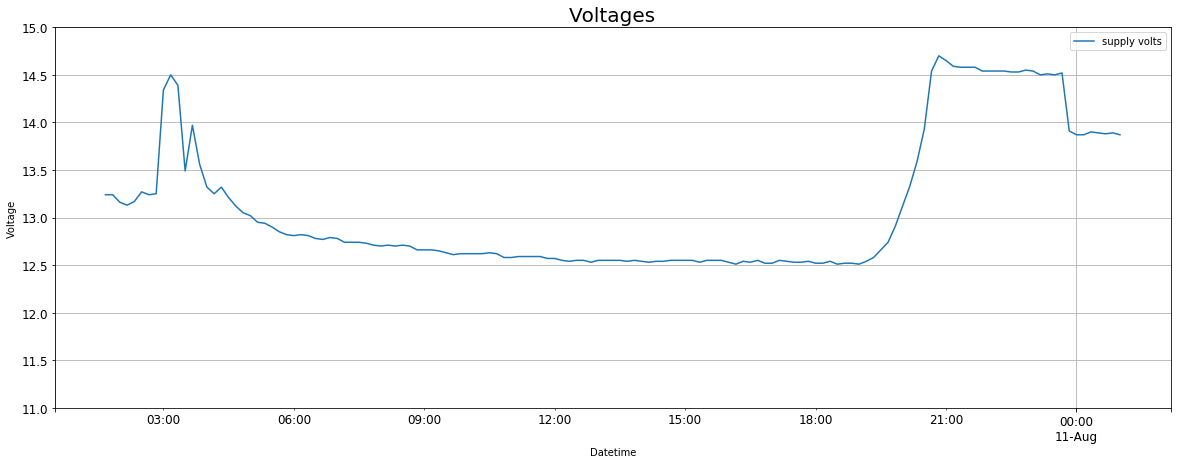

In [19]:
vol = data['SupplyVolts'].plot(figsize=(20,7), title='Voltages', label='supply volts', fontsize=12)
#data['LithiumVolts'].plot(ax=vol, label='lithium volts')
vol.title.set_size(20)
vol.grid()
vol.set_ylim(11,15)
vol.set_ylabel("Voltage")
vol.legend(loc='best')

In [20]:
fig = vol.get_figure()
fig.savefig(directory+'field_logger_voltage.png', dpi=100, bbox_inches='tight')

**Temperatures**

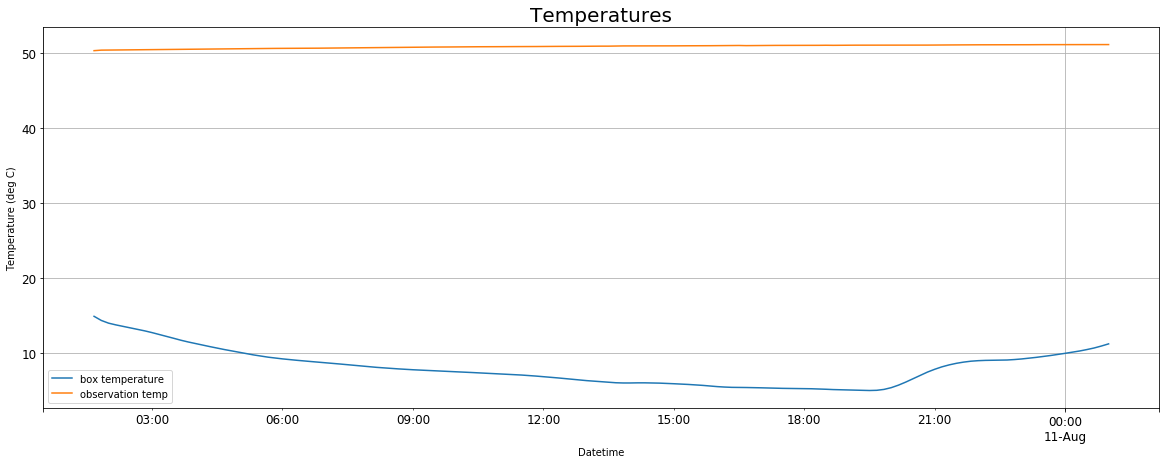

In [22]:
tmp = data['PTemp_degC'].plot(figsize=(20,7), title='Temperatures', label='box temperature', fontsize=12)
data['Temp_PRT_degC'].plot(ax=tmp, label='observation temp')
tmp.title.set_size(20)
tmp.grid()
tmp.set_ylabel("Temperature (deg C)")
tmp.legend(loc='best')

In [23]:
fig = tmp.get_figure()
fig.savefig(directory+'field_logger_temperature.png', dpi=100, bbox_inches='tight')

**Depth**

In [34]:
if (directory == './Inferno/' or directory == './RuapehuCraterLake/'):
    dep = data['Depth_USGS_OTT_meters'].plot(figsize=(20,7), title='Water Depth Above Sensor',fontsize=12)
    dep.title.set_size(20)
    dep.grid()
    dep.set_ylabel("Depth (m)")

    fig = dep.get_figure()
    fig.savefig(directory+'field_logger_depth.png', dpi=100, bbox_inches='tight')

In [35]:
if directory == './Inferno/':
    data[data['Depth_USGS_OTT_meters']>12]